<a href="https://colab.research.google.com/github/kalki81000/Internship-Lamba-AI-ML-DS/blob/main/EMI_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score


In [4]:
Data = pd.read_csv('emi_prediction_dataset.csv')

/tmp/ipython-input-3882702425.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('emi_prediction_dataset.csv')


In [5]:
Data.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700,660.0,303200,70200.0,Personal Loan EMI,850000,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,Yes,4100,714.0,92500,26900.0,E-commerce Shopping EMI,128000,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,No,0,650.0,672100,324200.0,Education EMI,306000,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,No,0,685.0,440900,178100.0,Vehicle EMI,304000,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,No,0,770.0,97300,28200.0,Home Appliances EMI,252000,7,Not_Eligible,500.0


In [7]:
Data.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [8]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  int64  
 13  college_fees            404800 non-null  int64  
 14  travel_expenses     

In [10]:
for col in Data.columns:
    if Data[col].dtype == 'object':
        Data[col].fillna(Data[col].mode()[0], inplace=True)
    else:
        Data[col].fillna(Data[col].median(), inplace=True)


/tmp/ipython-input-235459962.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data[col].fillna(Data[col].mode()[0], inplace=True)
/tmp/ipython-input-235459962.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [14]:
# Identify columns that are object type but should be numeric
numeric_cols_to_convert = ['age', 'monthly_salary', 'bank_balance']

# Convert these columns to numeric, coercing errors
for col in numeric_cols_to_convert:
    Data[col] = pd.to_numeric(Data[col], errors='coerce')

# Fill remaining NaN values after conversion (using median as before)
for col in numeric_cols_to_convert:
    Data[col].fillna(Data[col].median(), inplace=True)

# Apply LabelEncoder to remaining object columns (which are truly categorical)
label_enc = LabelEncoder()
for col in Data.select_dtypes(include='object').columns:
    Data[col] = label_enc.fit_transform(Data[col])

/tmp/ipython-input-3696662203.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data[col].fillna(Data[col].median(), inplace=True)


In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  float64
 1   gender                  404800 non-null  int64  
 2   marital_status          404800 non-null  int64  
 3   education               404800 non-null  int64  
 4   monthly_salary          404800 non-null  float64
 5   employment_type         404800 non-null  int64  
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  int64  
 8   house_type              404800 non-null  int64  
 9   monthly_rent            404800 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  int64  
 13  college_fees            404800 non-null  int64  
 14  travel_expenses     

In [18]:
X = Data.drop(columns=["emi_eligibility", "max_monthly_emi"])
y_class = Data["emi_eligibility"]
y_reg = Data["max_monthly_emi"]

In [20]:
X.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure
0,38.0,2,0,3,82600.0,1,0.9,2,2,20000.0,...,19500,13200,1,23700,660.0,303200.0,70200.0,3,850000,15
1,38.0,2,0,0,21500.0,1,7.0,1,0,0.0,...,5400,3500,1,4100,714.0,92500.0,26900.0,0,128000,19
2,38.0,5,0,3,86100.0,1,5.8,4,1,0.0,...,19400,6000,0,0,650.0,672100.0,324200.0,1,306000,16
3,58.0,2,0,1,66800.0,1,2.2,2,1,0.0,...,11900,7900,0,0,685.0,440900.0,178100.0,4,304000,83
4,48.0,2,0,3,57300.0,1,3.4,2,0,0.0,...,16200,8100,0,0,770.0,97300.0,28200.0,2,252000,7


In [21]:
y_class.head()


,emi_eligibility
0,2
1,2
2,0
3,0
4,2


In [22]:
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

In [24]:
X_train


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure
155851,32.0,2,0,0,38600.0,0,8.9,4,1,0.0,...,6200,6400,0,0,718.0,185300.0,46400.0,4,1168000,50
334888,48.0,5,0,1,87300.0,1,3.4,4,2,19300.0,...,24500,17000,0,0,745.0,362300.0,145700.0,2,98000,17
287459,38.0,5,0,0,48700.0,0,3.6,4,0,0.0,...,7800,5900,1,5300,723.0,253300.0,74000.0,1,395000,12
223619,48.0,2,0,3,49600.0,2,6.8,2,0,0.0,...,8000,2700,0,0,645.0,258800.0,122800.0,1,398000,34
115669,32.0,2,1,2,88500.0,2,0.5,4,1,0.0,...,15800,14200,1,22900,543.0,530000.0,305400.0,1,123000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,32.0,5,1,0,103600.0,1,1.9,1,1,0.0,...,22700,18600,0,0,717.0,712700.0,171200.0,1,380000,39
365838,38.0,5,0,2,19500.0,1,8.0,0,0,0.0,...,5600,3800,0,0,658.0,31700.0,11300.0,1,171000,29
131932,38.0,5,0,2,117300.0,1,3.8,4,2,19800.0,...,23400,15400,0,0,704.0,194900.0,52900.0,0,29000,23
146867,27.0,5,0,0,82500.0,1,0.5,0,0,0.0,...,19500,12800,0,0,1200.0,455400.0,132000.0,2,153000,29


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_class_train)

y_class_pred = clf.predict(X_test_scaled)
print("\nClassification Results:")
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print(classification_report(y_class_test, y_class_pred))


Classification Results:
Accuracy: 0.8892292490118577
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     14958
           1       0.12      0.00      0.01      3431
           2       0.92      0.96      0.94     62571

    accuracy                           0.89     80960
   macro avg       0.60      0.58      0.57     80960
weighted avg       0.86      0.89      0.87     80960



In [27]:
# ----------------------------------------------------
reg = LinearRegression()
reg.fit(X_train_scaled, y_reg_train)

y_reg_pred = reg.predict(X_test_scaled)
print("\nRegression Results:")
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("R² Score:", r2_score(y_reg_test, y_reg_pred))


Regression Results:
MAE: 2989.1034136871685
R² Score: 0.7077663943243199


In [29]:
top_corr = Data.corr()['max_monthly_emi'].sort_values(ascending=False).head(10)
print("\n🔍 Top 10 Correlated Features with max_monthly_emi:")
print(top_corr)


🔍 Top 10 Correlated Features with max_monthly_emi:
max_monthly_emi           1.000000
groceries_utilities       0.484695
bank_balance              0.455462
travel_expenses           0.440948
emergency_fund            0.414036
other_monthly_expenses    0.382055
monthly_salary            0.378284
credit_score              0.228814
education                 0.195277
marital_status            0.055107
Name: max_monthly_emi, dtype: float64


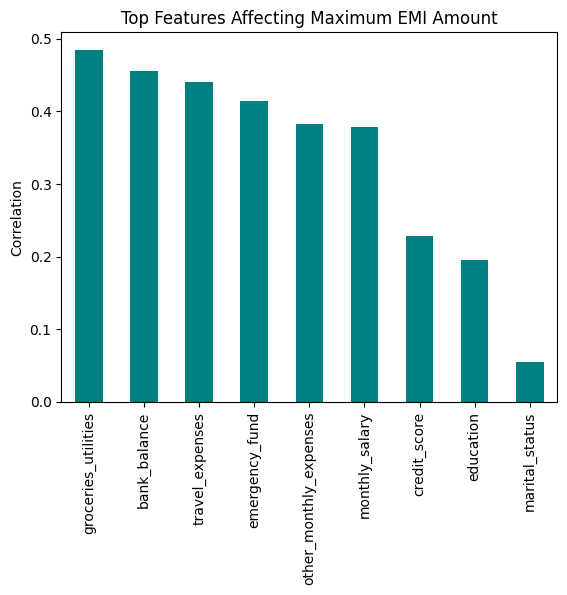

In [31]:
import matplotlib.pyplot as plt

top_corr.drop('max_monthly_emi').plot(kind='bar', color='teal')
plt.title("Top Features Affecting Maximum EMI Amount")
plt.ylabel("Correlation")
plt.show()